<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 182.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 168.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.2 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### Clean data and impute missing values

In [5]:
# Step 3: Clean and Prepare the Data

# Remove duplicates based on key identifying columns
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]
df_cleaned = df.drop_duplicates(subset=subset_cols)

# Drop unnecessary columns
cols_to_drop = ['Respondent', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith']
df_cleaned = df_cleaned.drop(columns=cols_to_drop, errors='ignore')

# Impute missing values
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')
df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)

edlevel_mode = df_cleaned['EdLevel'].mode(dropna=True)[0]
df_cleaned['EdLevel'].fillna(edlevel_mode, inplace=True)

remotework_mode = df_cleaned['RemoteWork'].mode(dropna=True)[0]
df_cleaned['RemoteWork'].fillna(remotework_mode, inplace=True)


/tmp/ipykernel_298/4034566152.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)
/tmp/ipykernel_298/4034566152.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [6]:
##Write your code here
df_cleaned.columns.tolist()


['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'Of

/tmp/ipykernel_298/547689318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='tab10')


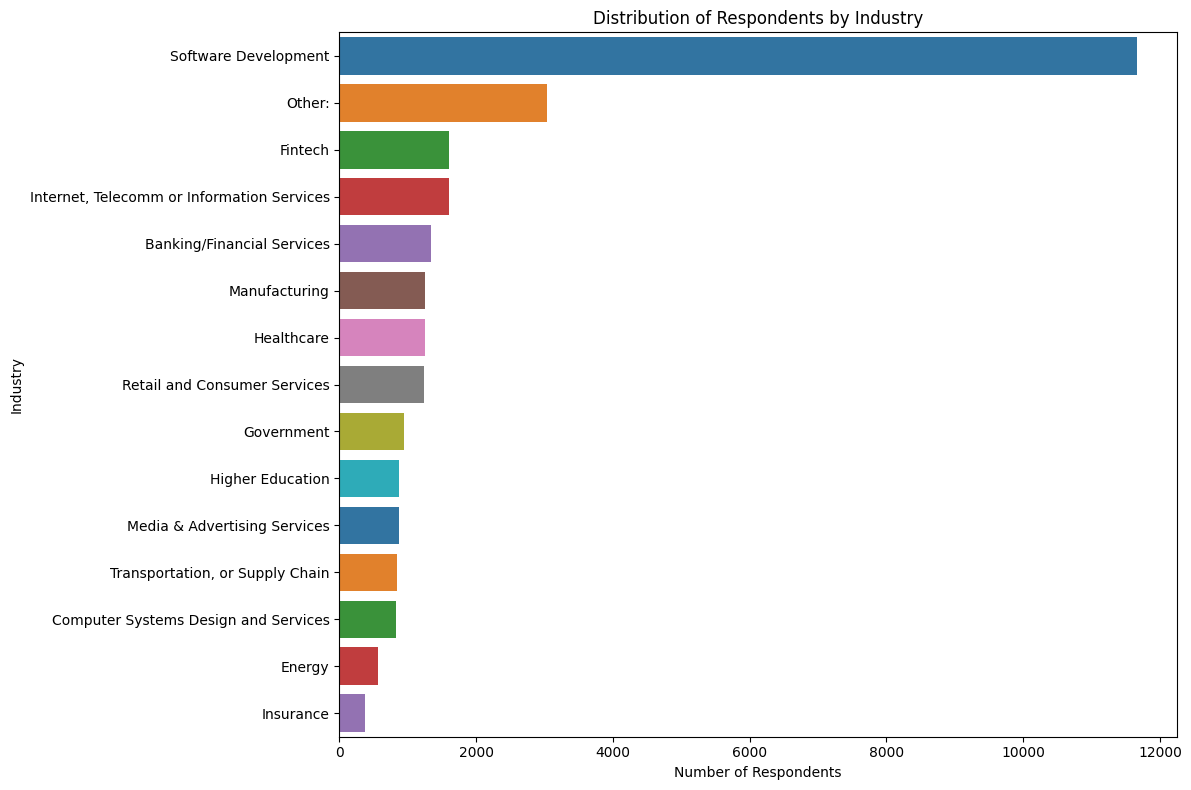

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values in 'Industry' before plotting
industry_counts = df_cleaned['Industry'].dropna().value_counts()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='tab10')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [9]:
##Write your code here
# Drop missing values in compensation column
comp_data = df_cleaned['ConvertedCompYearly'].dropna()

# Calculate basic statistics
mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()

print(f"Mean: {mean_comp:,.2f}")
print(f"Median: {median_comp:,.2f}")
print(f"Standard Deviation: {std_comp:,.2f}")

# Define outlier threshold (3 standard deviations above the mean)
threshold = mean_comp + 3 * std_comp
print(f"Outlier Threshold (mean + 3*std): {threshold:,.2f}")

# Filter outliers
high_outliers = df_cleaned[df_cleaned['ConvertedCompYearly'] > threshold]

# Display number of outliers and preview
print(f"Number of High Compensation Outliers: {len(high_outliers)}")
high_outliers[['ResponseId', 'Country', 'ConvertedCompYearly']].head()


Mean: 86,135.05
Median: 65,000.00
Standard Deviation: 188,011.08
Outlier Threshold (mean + 3*std): 650,168.29
Number of High Compensation Outliers: 84


,ResponseId,Country,ConvertedCompYearly
828,829,United States of America,1000000.0
1932,1933,United States of America,945000.0
2171,2172,United States of America,750000.0
2187,2188,Gabon,2000000.0
2316,2317,United States of America,1000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Lower Bound: -80,305.50
Upper Bound: 220,882.50
Number of IQR Outliers: 962


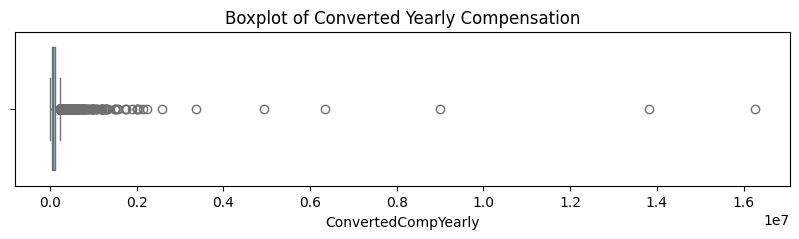

In [10]:
##Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values in compensation
comp_data = df_cleaned['ConvertedCompYearly'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")

# Filter outliers
iqr_outliers = df_cleaned[(df_cleaned['ConvertedCompYearly'] < lower_bound) |
                          (df_cleaned['ConvertedCompYearly'] > upper_bound)]

print(f"Number of IQR Outliers: {len(iqr_outliers)}")

# Plot boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=comp_data, color='skyblue')
plt.title('Boxplot of Converted Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.show()


Adjusted Lower Bound: 0.00
Upper Bound: 220,882.50
Number of IQR Outliers (Adjusted): 962


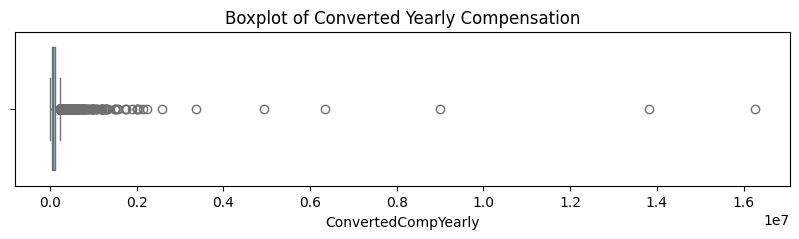

In [11]:
# Adjust lower bound to make sense for compensation data
adjusted_lower_bound = max(0, Q1 - 1.5 * IQR)
adjusted_upper_bound = Q3 + 1.5 * IQR

print(f"Adjusted Lower Bound: {adjusted_lower_bound:,.2f}")
print(f"Upper Bound: {adjusted_upper_bound:,.2f}")

# Recalculate outliers using adjusted lower bound
iqr_outliers = df_cleaned[(df_cleaned['ConvertedCompYearly'] < adjusted_lower_bound) |
                          (df_cleaned['ConvertedCompYearly'] > adjusted_upper_bound)]

print(f"Number of IQR Outliers (Adjusted): {len(iqr_outliers)}")

# Re-plot with same data
plt.figure(figsize=(10, 2))
sns.boxplot(x=comp_data, color='skyblue')
plt.title('Boxplot of Converted Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [12]:
##Write your code here
# Use the adjusted bounds from earlier
adjusted_lower_bound = max(0, Q1 - 1.5 * IQR)
adjusted_upper_bound = Q3 + 1.5 * IQR

# Filter to exclude outliers
df_no_outliers = df_cleaned[(df_cleaned['ConvertedCompYearly'] >= adjusted_lower_bound) &
                            (df_cleaned['ConvertedCompYearly'] <= adjusted_upper_bound)]

# Display size before and after
print(f"Original DataFrame Size: {df_cleaned.shape}")
print(f"New DataFrame Size (Outliers Removed): {df_no_outliers.shape}")


Original DataFrame Size: (60584, 112)
New DataFrame Size (Outliers Removed): (22067, 112)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [13]:
##Write your code here
df_cleaned.describe()

,ResponseId,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,60584.000000,60584.000000,3.297000e+04,29047.000000,28731.000000,28797.000000,28815.000000,28854.000000,28851.000000,28861.000000,28859.000000,28853.000000,28848.000000,2.302900e+04,28532.000000
mean,31167.207266,10.212135,3.033060e+145,11.536544,18.600606,7.555171,10.057535,24.344395,23.006094,20.287191,16.206896,10.960689,9.947137,8.613505e+04,6.935371
std,18352.019590,8.045465,5.507323e+147,9.210789,25.954250,18.449774,21.809882,27.077480,27.025228,26.102012,24.869127,22.908718,21.758149,1.880111e+05,2.090323
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,15308.750000,5.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.264000e+04,6.000000
50%,30806.500000,8.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,46640.250000,13.000000,2.500000e+05,16.000000,23.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.079370e+05,8.000000
max,65436.000000,50.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [19]:
df_cleaned['Age'].unique()


array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [20]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply the corrected mapping
df_cleaned['Age_Numeric'] = df_cleaned['Age'].map(age_map)



In [21]:
# Select numeric columns including Age_Numeric
numeric_cols = df_cleaned.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Display correlation of Age_Numeric with other columns
age_corr = correlation_matrix['Age_Numeric'].sort_values(ascending=False)
print(age_corr)


Age_Numeric            1.000000
WorkExp                0.850616
YearsCodePro           0.707446
ConvertedCompYearly    0.121431
JobSat                 0.070414
CompTotal             -0.002823
ResponseId            -0.006288
JobSatPoints_1        -0.028891
JobSatPoints_8        -0.047039
JobSatPoints_6        -0.051333
JobSatPoints_4        -0.077665
JobSatPoints_9        -0.082899
JobSatPoints_7        -0.083830
JobSatPoints_5        -0.103078
JobSatPoints_11       -0.108112
JobSatPoints_10       -0.115990
Name: Age_Numeric, dtype: float64


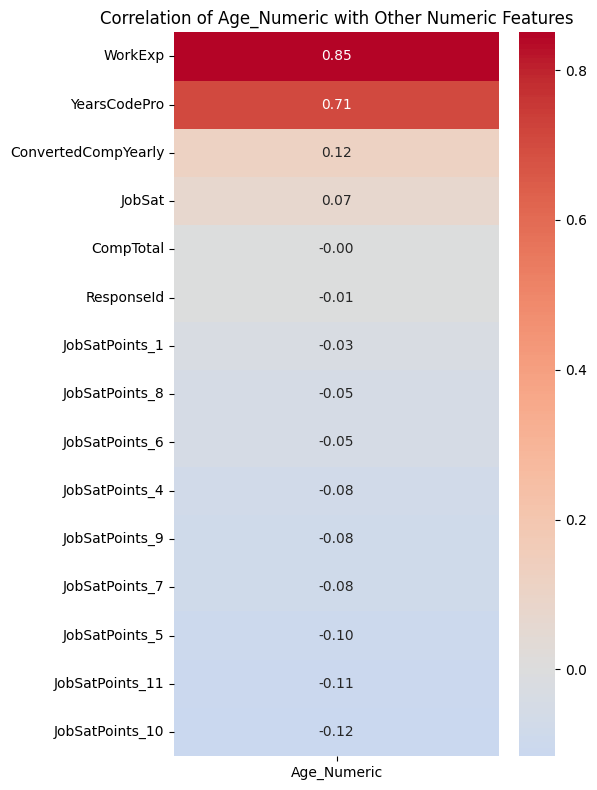

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter just the Age_Numeric correlations
age_corr_matrix = df_cleaned.select_dtypes(include='number').corr()[['Age_Numeric']].drop('Age_Numeric')

# Sort for better readability
age_corr_matrix = age_corr_matrix.sort_values(by='Age_Numeric', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(age_corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation of Age_Numeric with Other Numeric Features')
plt.tight_layout()
plt.show()


#### Additional steps for checklist

In [23]:
df_cleaned['Age_Numeric'].describe()[['min', '25%', '50%', '75%', 'max']]


min    16.0
25%    29.5
50%    29.5
75%    39.5
max    70.0
Name: Age_Numeric, dtype: float64

In [24]:
five_number_summary = {
    'Min': df_cleaned['Age_Numeric'].min(),
    '25th Percentile': df_cleaned['Age_Numeric'].quantile(0.25),
    'Median': df_cleaned['Age_Numeric'].median(),
    '75th Percentile': df_cleaned['Age_Numeric'].quantile(0.75),
    'Max': df_cleaned['Age_Numeric'].max()
}

print(five_number_summary)


{'Min': np.float64(16.0), '25th Percentile': np.float64(29.5), 'Median': np.float64(29.5), '75th Percentile': np.float64(39.5), 'Max': np.float64(70.0)}


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
